To Do
-----

* Stabilize
* Contourf movie with RAs and Decs
* Input EPIC ID
* Input moving target name
* Move HDF5 from k2mosaic to k2movie
* Run from Gully's data disk instead of online
* Add some unit tests
* Multiple channels


Unit Tests:
-----------
**Targets:**

* Single star
* Supernova
* Dipper
* Asteroid
* Superstamp
* Variable
* Tabby
* Pleiades

**Style**
* Single cadence
* Multiple cadences
* All cadences
* Tracking
* Multichannel

In [348]:
import sys
sys.path.append('../source/')
import k2movie
import astropy.units as u
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import K2ephem
from astropy.coordinates import SkyCoord
import astropy.units as u
targs=pd.read_csv('../notebooks/c6-c2.csv',skiprows=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


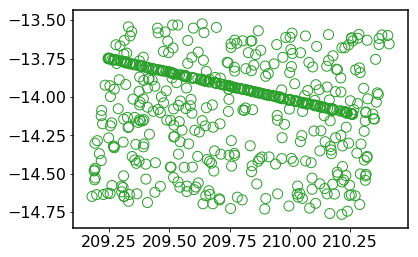

In [114]:
c=SkyCoord(targs.ra,targs.dec,unit=(u.hourangle,u.deg))

Initialised:
	Campaign: 6
	Channel: 2
	Cadence: [0]
	Pixel Tolerance: 50


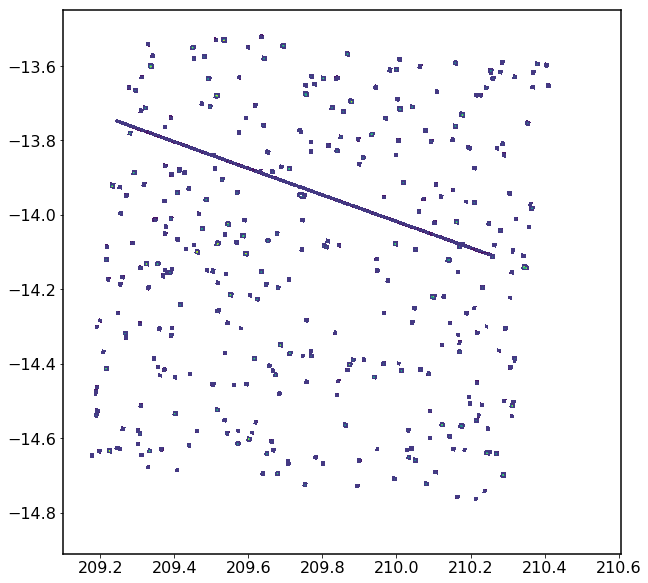

In [231]:
mov=k2movie.k2movie(campaign=6,channel=2,
                    verbose=True)
fig,ax=plt.subplots(figsize=(10,10))
fig=mov.inspect(ax,radec=True)


In [120]:
mov.loc

(512, 512)

In [219]:
mov=k2movie.k2movie(campaign=6,cadence=0,channel=2,
                    loc=(c.ra.deg[400]*u.deg,c.dec.deg[400]*u.deg),
                    tol=20,
                    verbose=True,
                    return_radec=True,vmin=0,vmax=1,inset=False)
mov.compute()

Initialised:
	Campaign: 6
	Channel: 2
	Cadence: [0]
	Pixel Tolerance: 20
Finding location on focal plane
	Pixel Location: [607] [291]
Trimming data
Creating data array
Finished (3.3s)
Creating data axes
Creating RA/Dec Axes
Writing to movie
	Output file: out.mp4
Saving...
Saved. (0.17s)


../source/k2movie.py:209: RuntimeWarning: invalid value encountered in log10
  im=ax.imshow(np.log10(self.ar[:,:,0]),cmap=cmap,vmin=self.vmin,vmax=self.vmax,origin='bottom',interpolation='none')
../source/k2movie.py:245: RuntimeWarning: invalid value encountered in log10
  im.set_array(np.log10(self.ar[:,:,i]))
../source/k2movie.py:245: RuntimeWarning: invalid value encountered in log10
  im.set_array(np.log10(self.ar[:,:,i]))


In [ ]:
print (c.ra.deg[0],c.dec.deg[0])

In [238]:
mov=k2movie.k2movie(campaign=6,channel=2,tol=50,inset_size=4,verbose=True,return_radec=True)

Initialised:
	Campaign: 6
	Channel: 2
	Cadence: [0]
	Pixel Tolerance: 50


Obtaining ephemeris for 22056 from JPL/Horizons...


[21 22 24 42]
Initialised:
	Campaign: 6
	Channel: 21
	Cadence: [0]
	Pixel Tolerance: 50


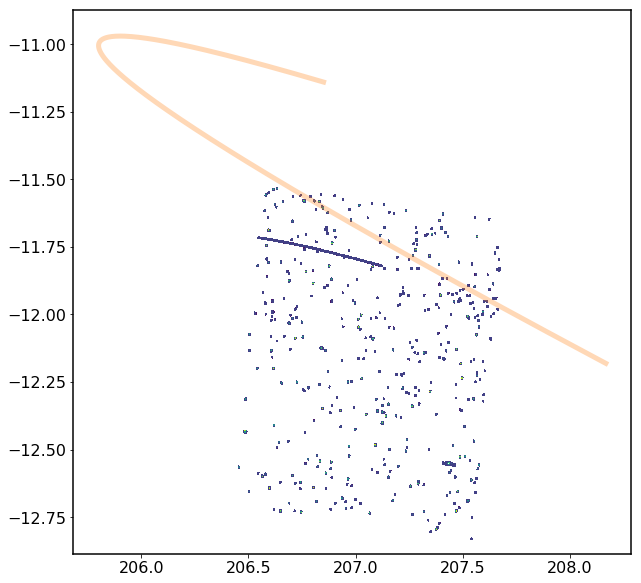

In [474]:
from astropy.time import Time
from K2fov.K2onSilicon import onSiliconCheck,fields
import numpy as np

#Parse...object
#Check against...Simbad...JPL asteroids with K2ephem...Mast? Find relevant RAS, Decs, channels

#Find an asteroid
name='22056'
campaign=6
cadtime=((mov.cols-mov.cols[0])*LC).to(u.day).value+start_time


ncad=3700
start_time=(2384.45356226+2454833.) #Need start times for all campaigns in JD
LC=29.4295*u.min





#Sparsely look to save time
cad=np.arange(0,ncad,100)



df=K2ephem.get_ephemeris_dataframe(name,campaign,campaign,step_size=1./(4))
times=[t[0:23] for t in np.asarray(df.index,dtype=str)]
df_jd=Time(times,format='isot').jd
locs=[np.interp(cadtime[cad],df_jd,df.ra)*u.deg,np.interp(cadtime[cad],df_jd,df.dec)*u.deg]

#Only on silicon
k = fields.getKeplerFov(campaign)
mask=list(map(onSiliconCheck,locs[0].value,locs[1].value,np.repeat(k,len(locs[0]))))
locs=[locs[0][mask],locs[1][mask]]
channel=np.asarray(np.unique(k.getChannelColRowList(locs[0].value,locs[1].value)[0]),dtype=int)
print(channel)
cad=cad[mask]
cad=np.arange(cad[0],cad[-1])
locs=[np.interp(cadtime[cad],df_jd,df.ra)*u.deg,np.interp(cadtime[cad],df_jd,df.dec)*u.deg]



mov=k2movie.k2movie(campaign=campaign,channel=int(channel[0]),tol=50,inset_size=4,verbose=True,return_radec=True)
fig,ax=plt.subplots(figsize=(10,10))
fig=mov.inspect(ax,radec=True)


plt.plot(locs[0],locs[1],c='C1',lw=5,alpha=0.3)



In [476]:
mov=k2movie.k2movie('8241')


[autoreload of k2movie failed: Traceback (most recent call last):
  File "/Users/ch/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/ch/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/ch/anaconda/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/ch/anaconda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "../source/k2movie.py", line 81
    if self.

ValueError: '=' alignment not allowed in string format specifier